# Intro to Scikit-Learn

## DIAO Daokui(22504242) JIN Zhuoyuan(22503108) CHAN Xuanyu(22503865)

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [112]:
%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.5.x

1.7.2


In [113]:
iris = datasets.load_iris()

In [114]:
type(iris)

sklearn.utils._bunch.Bunch

In [115]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [116]:
type(iris.data)

numpy.ndarray

In [117]:
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [118]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [119]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [120]:
features_2d = iris.feature_names[:2]
print(features_2d)

['sepal length (cm)', 'sepal width (cm)']


In [121]:
xs_2d = df.loc[:, features_2d].values

ys = iris.target

In [122]:
print(xs_2d.shape)
print(ys.shape)

(150, 2)
(150,)


Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

#### Random selection of training (75%) and test sets (25%)

<span style="color:red">Implement your solution below</span>

In [123]:
# train_xs, test_xs, train_ys, test_ys = train_test_split(
#     xs_2d, ys, test_size=0.25, random_state=42, stratify=ys
# )
train_xs, test_xs, train_ys, test_ys = train_test_split(
    xs_2d, ys, test_size=0.25, random_state=42
)

print("train_xs", train_xs.shape, "test_xs", test_xs.shape)
print("train_ys", train_ys.shape, "test_ys", test_ys.shape)

train_xs (112, 2) test_xs (38, 2)
train_ys (112,) test_ys (38,)


### Training

<span style="color:red">Implement your solution below</span>

In [124]:
# 1. Model choice (import)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

# 2. Instantiation
models = {
    "LogisticRegression": LogisticRegression(max_iter=200, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=False, random_state=42),
}

# 3. Learn (fit) the model & 4. Predict on new data (test)
results = {}
for name, clf in models.items():
    clf.fit(train_xs, train_ys)
    y_pred = clf.predict(test_xs)
    acc = metrics.accuracy_score(test_ys, y_pred)
    results[name] = {"model": clf, "y_pred": y_pred, "accuracy": acc}
    print(f"{name}: accuracy = {acc:.3f}")
    print(metrics.classification_report(test_ys, y_pred, target_names=iris.target_names, zero_division=0))

LogisticRegression: accuracy = 0.842
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.64      0.70        11
   virginica       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38

DecisionTree: accuracy = 0.658
              precision    recall  f1-score   support

      setosa       1.00      0.93      0.97        15
  versicolor       0.42      0.45      0.43        11
   virginica       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38

RandomForest: accuracy = 0.789
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.64      0

### Evaluation

[Evaluation_of_binary_classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics) ([Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))


$$
\mathrm{ACC}
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}
$$

<span style="color:red">Implement your solution below</span>

### Plot

In [125]:
def plot_decision_boundary(xs, model, colors=None, num=600):
    try:
        cmap = ListedColormap(colors.values())
    except AttributeError:
        cmap = None

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=num), np.linspace(y_min, y_max, num=num)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        zz,
        alpha=0.4,
        cmap=cmap,
        antialiased=True,
    )

In [126]:
def plot_points(xs, ys, ft_names=(None, None), target_names=None, colors=None):
    if target_names is None:
        target_names = {}
    if colors is None:
        colors = {}

    for y_val in set(ys):
        plt.scatter(
            xs[ys == y_val, 0],
            xs[ys == y_val, 1],
            color=colors.get(y_val),
            alpha=0.8,
            label=target_names.get(y_val),
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    try:
        plt.xlabel(ft_names[0])
        plt.ylabel(ft_names[1])
    except TypeError:
        pass

In [127]:
COLORS = {0: "green", 1: "red", 2: "blue"}

target_names = {k: v for k, v in enumerate(iris.target_names)}
target_names

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [128]:
# plot_points(test_xs, test_ys, features_2d, target_names, COLORS)

In [129]:
# plot_decision_boundary(test_xs, model, COLORS)

In [130]:
# plot_decision_boundary(test_xs, model, COLORS)
# plot_points(test_xs, test_ys, features_2d, target_names, COLORS)

## Exercise 1

Find in the [documentation](https://scikit-learn.org/stable/supervised_learning.html) how to apply these other models to this dataset:

* *[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*
* *[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*
* *[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*
* *[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*
* *[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*

Write the results in a table and graphically for each system using the `plot_...` [above](#Plot) functions, and give a short analysis comparing the results.


=== LogisticRegression: accuracy = 0.842 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.64      0.70        11
   virginica       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38



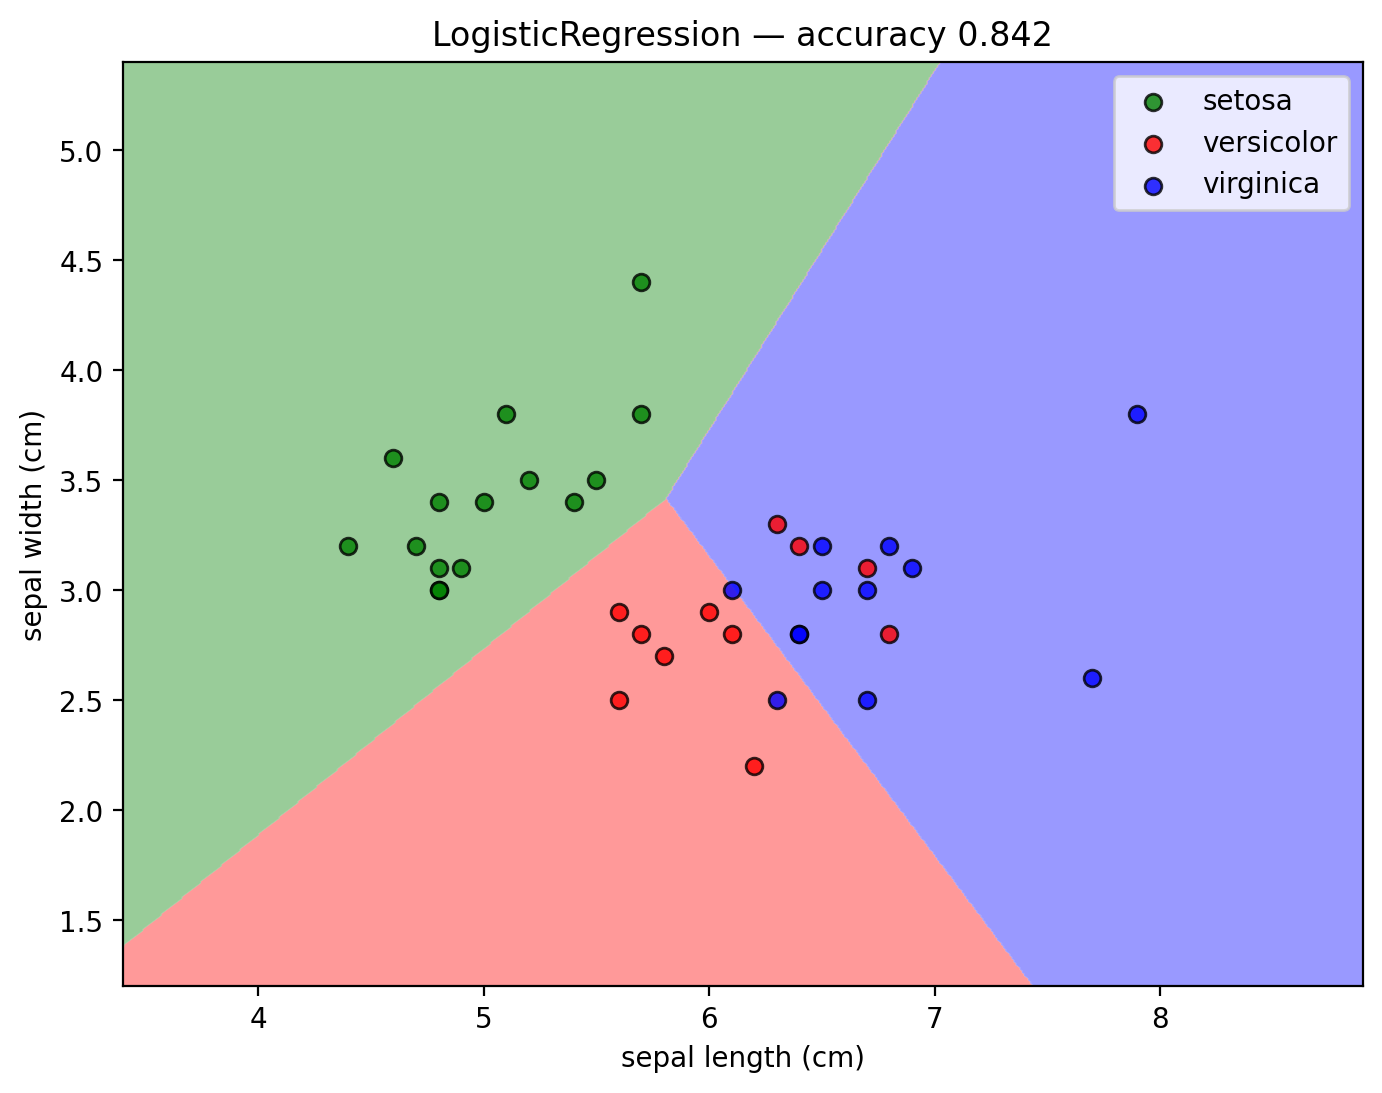


=== DecisionTree: accuracy = 0.658 ===
              precision    recall  f1-score   support

      setosa       1.00      0.93      0.97        15
  versicolor       0.42      0.45      0.43        11
   virginica       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38



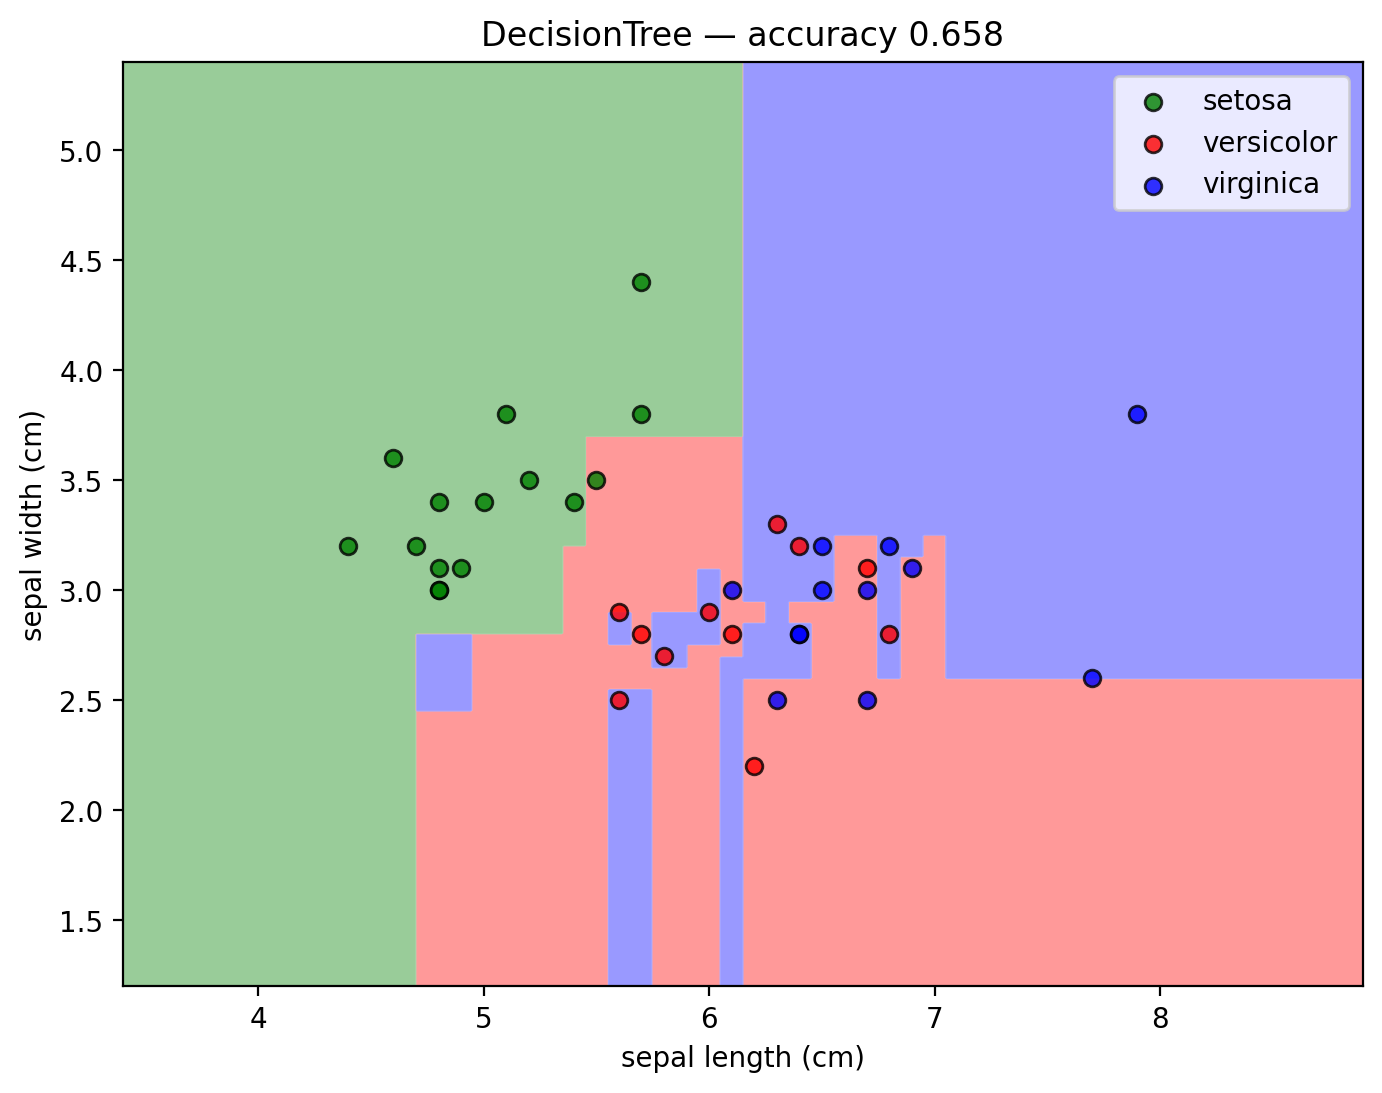


=== RandomForest: accuracy = 0.789 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.64      0.64      0.64        11
   virginica       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38



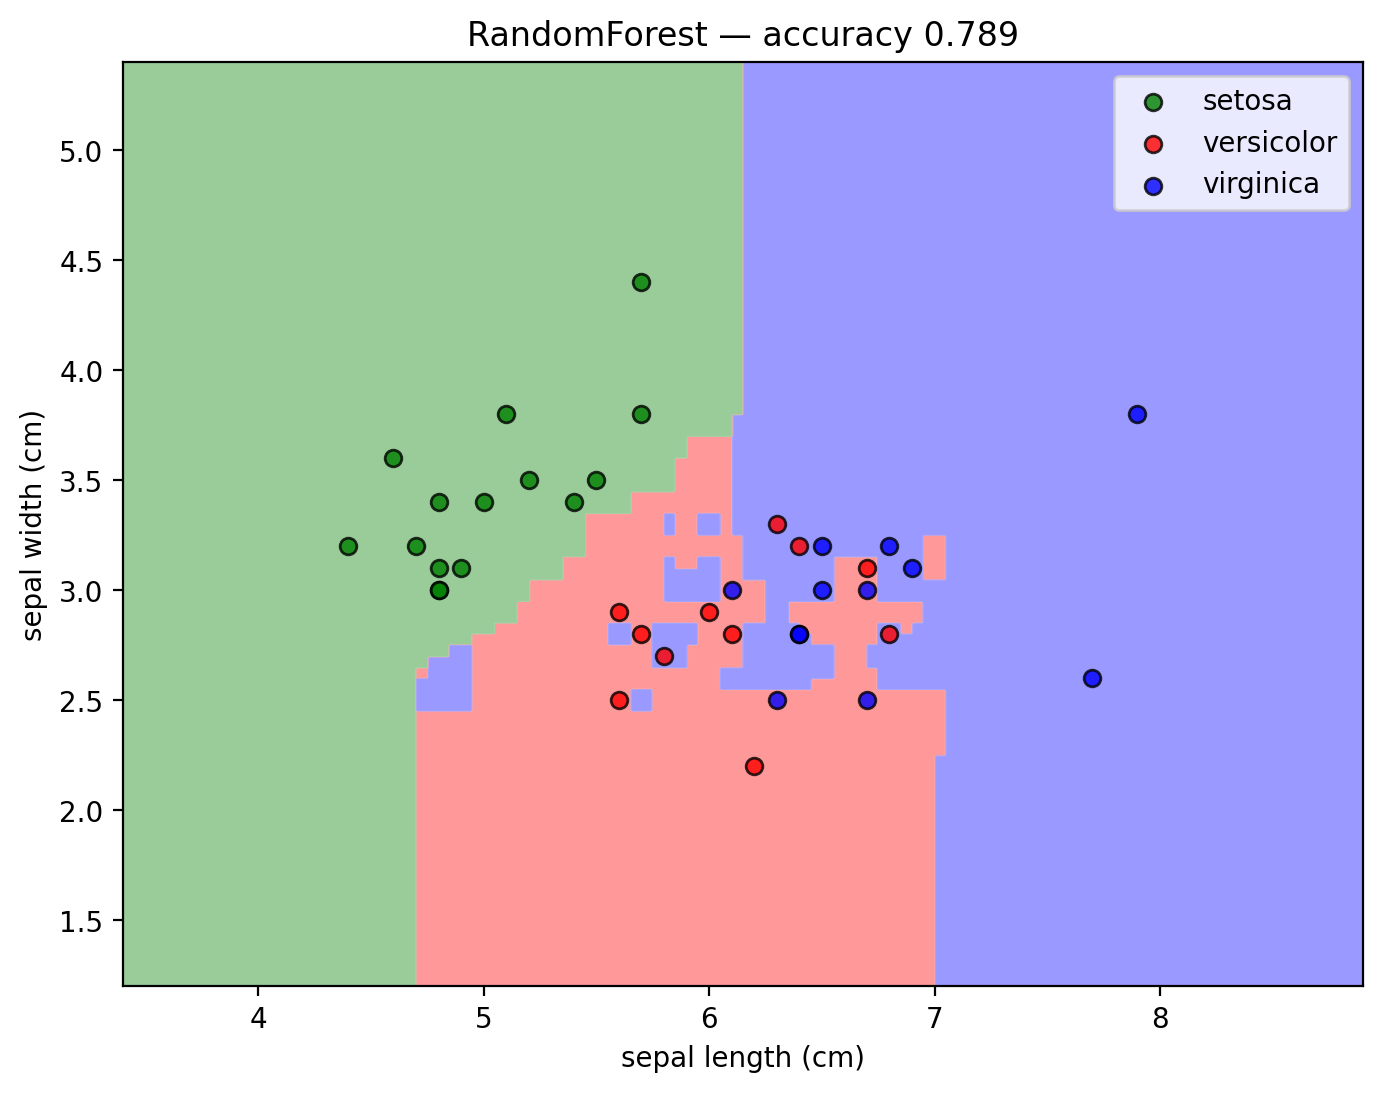


=== KNN: accuracy = 0.816 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.70      0.64      0.67        11
   virginica       0.69      0.75      0.72        12

    accuracy                           0.82        38
   macro avg       0.80      0.80      0.80        38
weighted avg       0.82      0.82      0.82        38



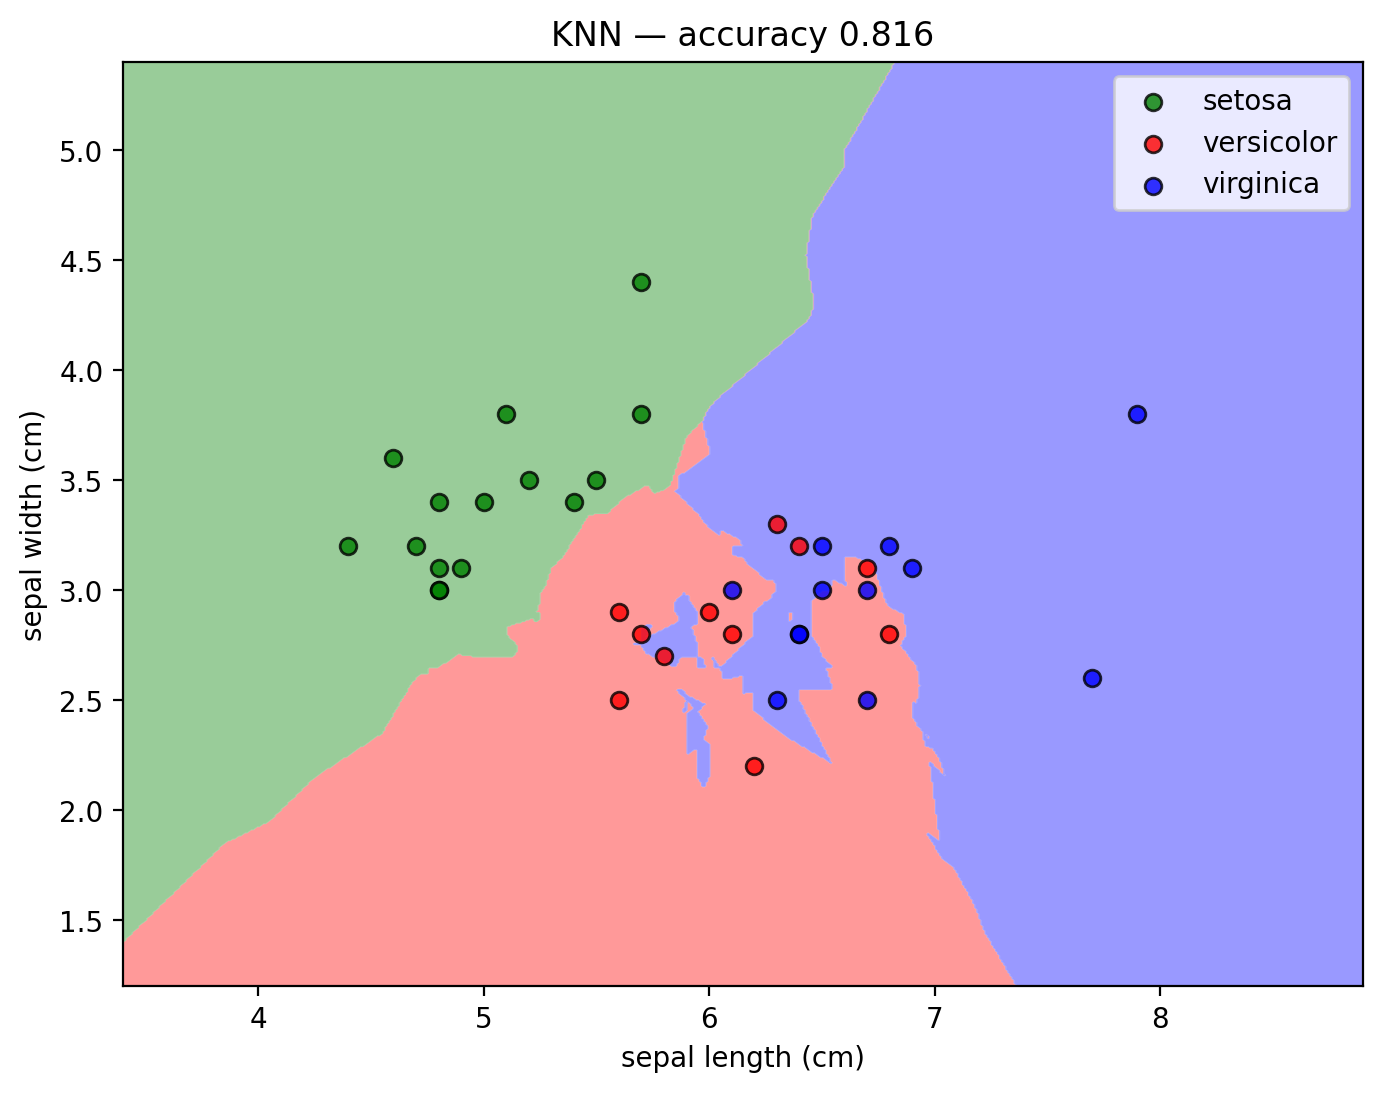


=== SVM: accuracy = 0.842 ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.64      0.70        11
   virginica       0.71      0.83      0.77        12

    accuracy                           0.84        38
   macro avg       0.83      0.82      0.82        38
weighted avg       0.85      0.84      0.84        38



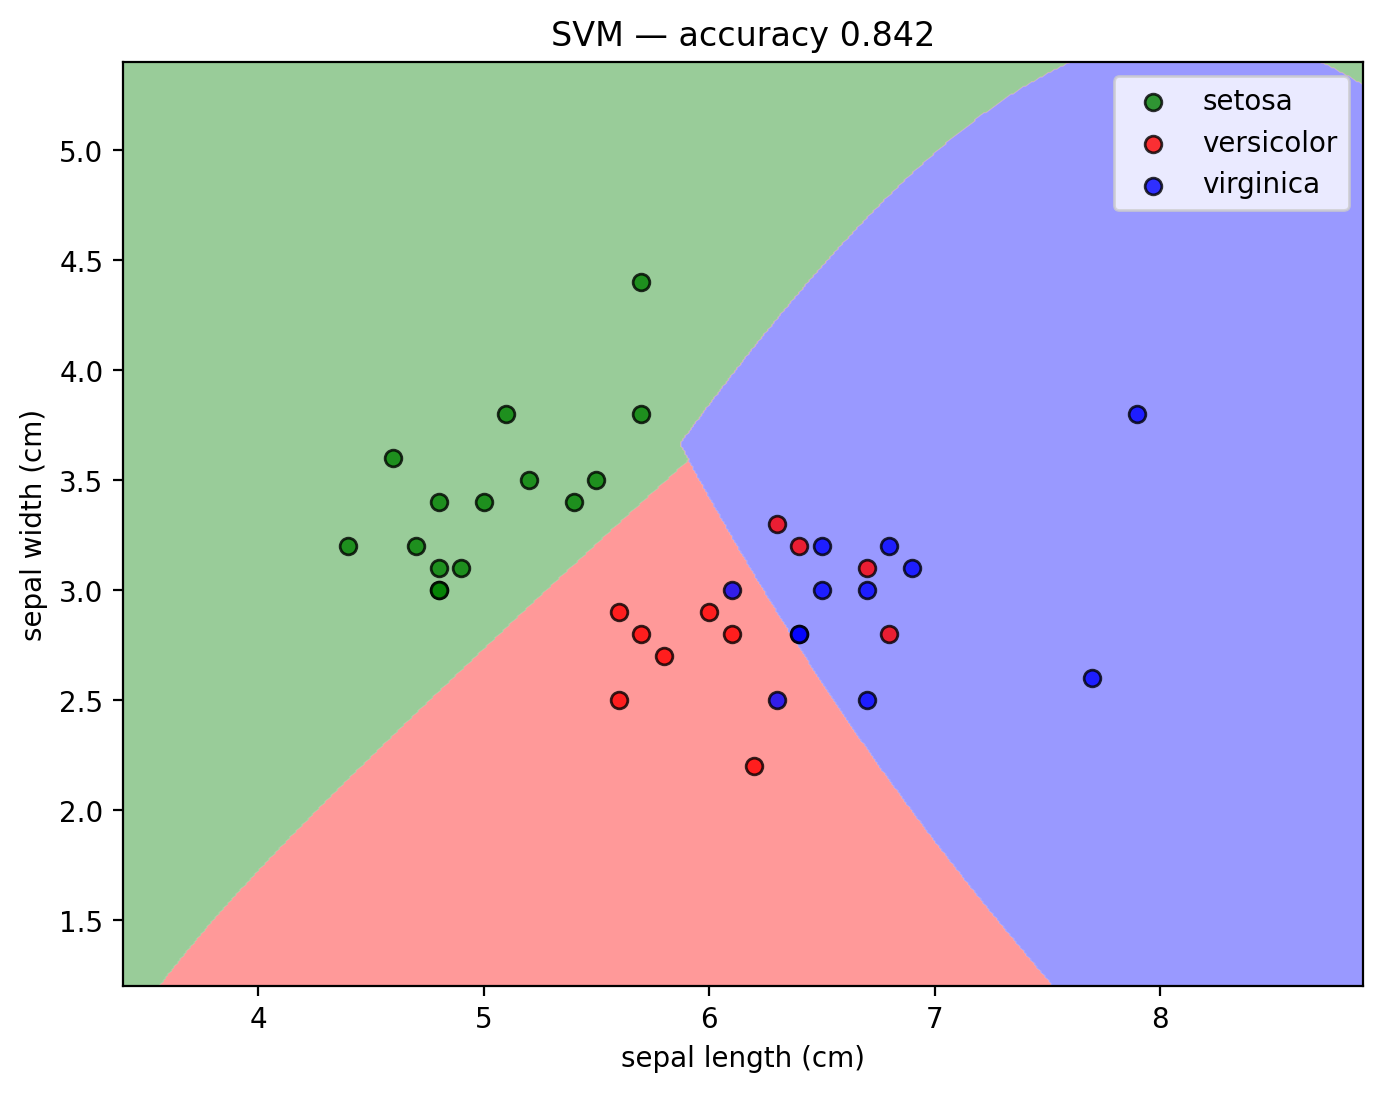


Summary table:
                    accuracy
model                       
LogisticRegression  0.842105
DecisionTree        0.657895
RandomForest        0.789474
KNN                 0.815789
SVM                 0.842105

Analysis:
Logistic Regression and SVM perform better with higher accuracy.
Decision Tree and Random Forest perform worse; on small datasets they can create fragmented decision boundaries, which may lead to overfitting.


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

models_ex1 = {
    "LogisticRegression": LogisticRegression(max_iter=200, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=False, random_state=42),
}

summary_rows = []
for name, clf in models_ex1.items():
    clf.fit(train_xs, train_ys)
    y_pred = clf.predict(test_xs)
    acc = metrics.accuracy_score(test_ys, y_pred)
    summary_rows.append({"model": name, "accuracy": acc})
    print(f"\n=== {name}: accuracy = {acc:.3f} ===")
    print(metrics.classification_report(test_ys, y_pred, target_names=iris.target_names, zero_division=0))
    # Plot decision boundary + points
    plot_decision_boundary(test_xs, clf, COLORS)
    plot_points(test_xs, test_ys, features_2d, target_names, COLORS)
    plt.title(f"{name} — accuracy {acc:.3f}")
    plt.show()

summary_df = pd.DataFrame(summary_rows).set_index("model")
print("\nSummary table:")
print(summary_df)

# Analysis
print("\nAnalysis:")
print("Logistic Regression and SVM perform better with higher accuracy.")
print("Decision Tree and Random Forest perform worse; on small datasets they can create fragmented decision boundaries, which may lead to overfitting.")


<span style="color:red">Implement your solution below</span>

## Exercise 2

* Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to all descriptors (there are 4) of the Iris dataset

* Give the ratio of the variance explained by each of the selected components, as well as their cumulative sum

* Apply one of the previous classifiers to the first two principal components

* Compare the quality of the predictions between those obtained with the first two principal components and those obtained with the first 2 descriptors (Exercise 1)

<span style="color:red">Implement your solution below</span>

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [133]:
# 1) Apply PCA
xs_all = df.values  
scaler = StandardScaler()
xs_scaled = scaler.fit_transform(xs_all)

pca = PCA(n_components=4, random_state=42)
pca.fit(xs_scaled)

,n_components,4
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


In [134]:
# 2）explained variance ratio and cumulative sum

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("explained_variance_ratio_:", np.round(explained, 4))
print("cumulative sum:", np.round(cum_explained, 4))

explained_variance_ratio_: [0.7296 0.2285 0.0367 0.0052]
cumulative sum: [0.7296 0.9581 0.9948 1.    ]


In [141]:
# 3) Apply one of the previous classifiers to the first two principal components
xs_pca2 = pca.transform(xs_scaled)[:, :2]

indices = np.arange(len(ys))
train_idx, test_idx = train_test_split(
    indices, test_size=0.25, random_state=42
)

train_pca, test_pca = xs_pca2[train_idx], xs_pca2[test_idx]
train_y_idx, test_y_idx = ys[train_idx], ys[test_idx]

# Train the classifier on the first two principal components and evaluate it
clf =DecisionTreeClassifier(random_state=42)
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(train_pca, train_y_idx)
y_pred_pca = clf.predict(test_pca)
acc_pca = metrics.accuracy_score(test_y_idx, y_pred_pca)

print(f"\nDecisionTree on first 2 PCA components — accuracy: {acc_pca:.3f}")
print(metrics.classification_report(test_y_idx, y_pred_pca, target_names=iris.target_names, zero_division=0))

# Train the same classifier on the first two original descriptors for comparison
train_2d = xs_2d[train_idx]
test_2d = xs_2d[test_idx]

clf2 = DecisionTreeClassifier(random_state=42)
# clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
# clf2 = LogisticRegression(max_iter=200, random_state=42)
clf2.fit(train_2d, train_y_idx)
y_pred_2d = clf2.predict(test_2d)
acc_2d = metrics.accuracy_score(test_y_idx, y_pred_2d)

print(f"\nDecisionTree on first 2 original descriptors — accuracy: {acc_2d:.3f}")
print(metrics.classification_report(test_y_idx, y_pred_2d, target_names=iris.target_names, zero_division=0))



DecisionTree on first 2 PCA components — accuracy: 0.947
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.91      0.91      0.91        11
   virginica       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38


DecisionTree on first 2 original descriptors — accuracy: 0.658
              precision    recall  f1-score   support

      setosa       1.00      0.93      0.97        15
  versicolor       0.42      0.45      0.43        11
   virginica       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38

